In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
df = pd.read_excel('census_income.xlsx')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
n_records = df.shape[0]

n_features = df.shape[1]

n_greater_50k = df[df['income'] == ' <=50K'].shape[0]

n_at_most_50k = df[df['income'] == ' >50K'].shape[0]

greater_percent =  (n_greater_50k / n_records) * 100

print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32560
Total number of features: 15
Individuals making more than $50k: 24719
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


In [8]:
df.drop('education', inplace=True, axis=1)
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [11]:
df.sex.value_counts()

sex
 Male      21774
 Female    10762
Name: count, dtype: int64

In [12]:
columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for column in columns:
    df[column] = df[column].str.strip()

C:\Users\Mayank\AppData\Local\Temp\ipykernel_13032\3198716899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.strip()


In [13]:
df.sex.value_counts()

sex
Male      21774
Female    10762
Name: count, dtype: int64

In [14]:
df.workclass.value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [15]:
change_columns = ['workclass', 'occupation', 'native_country']
for column in change_columns:
        df[column] = df[column].replace({'?': 'Unknown'})

C:\Users\Mayank\AppData\Local\Temp\ipykernel_13032\3963601727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace({'?': 'Unknown'})


In [16]:
df.workclass.value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [17]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


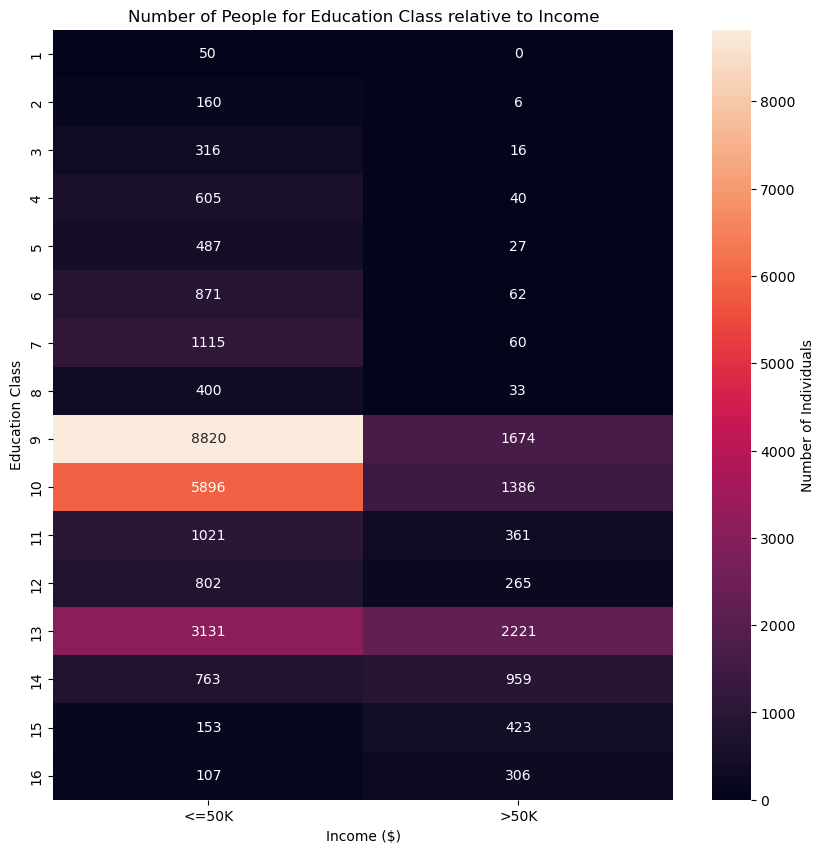

In [18]:
plt.figure(figsize=[10,10])
 
ct_counts = df.groupby(['education_num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education_num', columns = 'income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

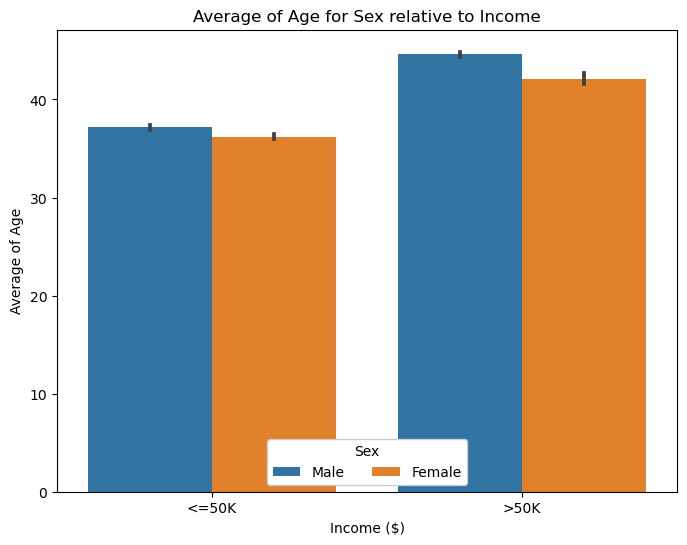

In [19]:
plt.figure(figsize=[8,6])
ax = sb.barplot(data = df, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

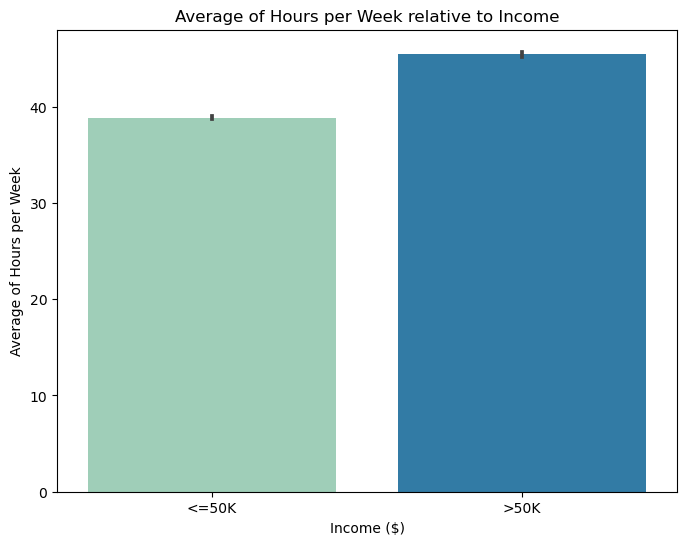

In [20]:
plt.figure(figsize=[8,6])
sb.barplot(data=df, x='income', y='hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

In [21]:
df_prep = df.copy()

In [22]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt']

scaler = MinMaxScaler()
df_prep[numerical] = scaler.fit_transform(df_prep[numerical])

In [23]:
df_prep.sample(4)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
6475,0.328767,Local-gov,0.134455,14,Never-married,Prof-specialty,Not-in-family,Black,Female,0.0,0.0,0.397959,United-States,<=50K
13452,0.109589,Private,0.108866,13,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,0.397959,United-States,<=50K
23605,0.013699,Private,0.116809,9,Never-married,Sales,Own-child,White,Female,0.0,0.0,0.244898,United-States,<=50K
29921,0.123288,Private,0.179475,9,Married-civ-spouse,Sales,Wife,White,Female,0.0,0.0,0.193878,United-States,<=50K


In [24]:
df_prep['sex'] = df_prep.sex.replace({"Female": 0, "Male": 1})
df_prep['income'] = df_prep.income.replace({"<=50K": 0, ">50K": 1})

df_prep = pd.get_dummies(df_prep)

In [25]:
encoded = list(df_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

92 total features after one-hot encoding.


In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [40]:
X = df_prep.drop('income', axis=1)
y = df_prep['income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
models = {}

models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [42]:
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression:
Accuracy: train:  0.8499431324318232 | test:  0.849121092135754
F1-score: train:  0.6555106167694605 | test:  0.6541441655726341
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999769487878905 | test:  0.8564052055329945
F1-score: train:  0.9999521620110514 | test:  0.6762393934375359
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.861115379558884 | test:  0.8602165848720997
F1-score: train:  0.681746966054651 | test:  0.679097227079003
---------------------------------------------------------


In [43]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [44]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

NameError: name 'X_resampled' is not defined